# Part 1: Reading data of Singapore location from a CSV file


#### CSV file source : https://www.kaggle.com/mylee2009/singapore-postal-code-mapper

In [40]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from unicodedata import normalize
import re, json, requests
from geopy import distance
from math import sqrt

mpl.style.use('ggplot')

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/nadio2207/DataScienceCapstone/master/sg_zipcode_mapper.csv', encoding='latin-1')

In [42]:
df.head(10)

,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721
2,629875,1.309135,103.679463,1 BENOI ROAD SINGAPORE 629875,1,BENOI ROAD,NIL,1 BENOI ROAD SINGAPORE 629875,629875
3,439731,1.305466,103.895674,1 BOSCOMBE ROAD SINGAPORE 439731,1,BOSCOMBE ROAD,NIL,1 BOSCOMBE ROAD SINGAPORE 439731,439731
4,659592,1.344619,103.749789,1 BUKIT BATOK STREET 22 SINGAPORE 659592,1,BUKIT BATOK STREET 22,NIL,1 BUKIT BATOK STREET 22 SINGAPORE 659592,659592
5,618292,1.314283,103.723913,1 BUROH LANE SINGAPORE 618292,1,BUROH LANE,NIL,1 BUROH LANE SINGAPORE 618292,618292
6,768069,1.437425,103.829625,1 CANBERRA,7,CANBERRA DRIVE,1 CANBERRA,7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069,768069
7,768070,1.437019,103.828763,1 CANBERRA,9,CANBERRA DRIVE,1 CANBERRA,9 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768070,768070
8,768071,1.437221,103.828939,1 CANBERRA,11,CANBERRA DRIVE,1 CANBERRA,11 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768071,768071
9,768073,1.437617,103.829271,1 CANBERRA,15,CANBERRA DRIVE,1 CANBERRA,15 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768073,768073


In [43]:
df.shape

(25293, 9)

In [44]:
# Get indexes where no building name
indexNames = df[(df['building'] == 'NIL')].index 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [45]:
df.shape

(21239, 9)

In [46]:
df = df.drop_duplicates(subset=['building'])

In [47]:
df["area"] = df["postal"].astype("str").str[:2]
df.head(11)


,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1,area
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614,39
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721,39
6,768069,1.437425,103.829625,1 CANBERRA,7,CANBERRA DRIVE,1 CANBERRA,7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069,768069,76
59,308143,1.319086,103.847054,1 MOULMEIN RISE,1,MOULMEIN RISE,1 MOULMEIN RISE,1 MOULMEIN RISE 1 MOULMEIN RISE SINGAPORE 308143,308143,30
127,288353,1.325808,103.812517,10 SHELFORD,10,SHELFORD ROAD,10 SHELFORD,10 SHELFORD ROAD 10 SHELFORD SINGAPORE 288353,288353,28
149,118518,1.275430,103.795764,100 PASIR PANJANG,100,PASIR PANJANG ROAD,100 PASIR PANJANG,100 PASIR PANJANG ROAD 100 PASIR PANJANG SINGA...,118518,11
340,229391,1.305059,103.839236,111 EMERALD HILL,111,EMERALD HILL ROAD,111 EMERALD HILL,111 EMERALD HILL ROAD 111 EMERALD HILL SINGAPO...,229391,22
347,428802,1.305206,103.905045,112 KATONG,112,EAST COAST ROAD,112 KATONG,112 EAST COAST ROAD 112 KATONG SINGAPORE 428802,428802,42
1102,288407,1.327320,103.812832,18 SHELFORD,18,SHELFORD ROAD,18 SHELFORD,18 SHELFORD ROAD 18 SHELFORD SINGAPORE 288407,288407,28
1107,539775,1.336316,103.888826,18 TAI SENG,18,TAI SENG STREET,18 TAI SENG,18 TAI SENG STREET 18 TAI SENG SINGAPORE 539775,539775,53


In [48]:
df["area"] = df["area"].astype("int")
df.dtypes

postal          int64
latitude      float64
longtitude    float64
searchval      object
blk_no         object
road_name      object
building       object
address        object
postal.1        int64
area            int64
dtype: object

In [49]:
df = df.rename(columns={'building': 'Neighbourhood'})

In [50]:
df.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,postal.1,area
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614,39
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721,39
6,768069,1.437425,103.829625,1 CANBERRA,7,CANBERRA DRIVE,1 CANBERRA,7 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768069,768069,76
59,308143,1.319086,103.847054,1 MOULMEIN RISE,1,MOULMEIN RISE,1 MOULMEIN RISE,1 MOULMEIN RISE 1 MOULMEIN RISE SINGAPORE 308143,308143,30
127,288353,1.325808,103.812517,10 SHELFORD,10,SHELFORD ROAD,10 SHELFORD,10 SHELFORD ROAD 10 SHELFORD SINGAPORE 288353,288353,28


#### Read data with postal code information
#### CSV file source : https://en.wikipedia.org/wiki/Postal_codes_in_Singapore


In [60]:
postal_table = pd.read_html('https://en.wikipedia.org/wiki/Postal_codes_in_Singapore')

In [61]:
df_postal = postal_table[0]
df_postal.head(5)

,Postal district,Postal sector(1st 2 digits of 6-digit postal codes),General location
0,1,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
1,2,"07, 08","Anson, Tanjong Pagar"
2,3,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
3,4,"09, 10","Telok Blangah, Harbourfront"
4,5,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."


In [62]:
df_postal = df_postal.rename(columns={'Postal sector(1st 2 digits of 6-digit postal codes)': 'area'})
df_postal.dtypes

Postal district      int64
area                object
General location    object
dtype: object

In [63]:
df_postal 

,Postal district,area,General location
0,1,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
1,2,"07, 08","Anson, Tanjong Pagar"
2,3,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
3,4,"09, 10","Telok Blangah, Harbourfront"
4,5,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."
5,6,17,"High Street, Beach Road (part)"
6,7,"18, 19","Middle Road, Golden Mile"
7,8,"20, 21","Little India, Farrer Park, Jalan Besar, Lavender"
8,9,"22, 23","Orchard, Cairnhill, River Valley"
9,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin"


# Part 2: Data Wrangling

In [64]:
df_postal["area"] = df_postal.area.str.split(',').tolist()
df_postal

,Postal district,area,General location
0,1,"[01, 02, 03, 04, 05, 06]","Raffles Place, Cecil, Marina, People's Park"
1,2,"[07, 08]","Anson, Tanjong Pagar"
2,3,"[14, 15, 16]","Bukit Merah, Queenstown, Tiong Bahru"
3,4,"[09, 10]","Telok Blangah, Harbourfront"
4,5,"[11, 12, 13]","Pasir Panjang, Hong Leong Garden, Clementi New..."
5,6,[17],"High Street, Beach Road (part)"
6,7,"[18, 19]","Middle Road, Golden Mile"
7,8,"[20, 21]","Little India, Farrer Park, Jalan Besar, Lavender"
8,9,"[22, 23]","Orchard, Cairnhill, River Valley"
9,10,"[24, 25, 26, 27]","Ardmore, Bukit Timah, Holland Road, Tanglin"


In [65]:
df_postal = df_postal.explode('area')

In [66]:
df_postal["area"] = df_postal["area"].astype("int")
df_postal

,Postal district,area,General location
0,1,1,"Raffles Place, Cecil, Marina, People's Park"
0,1,2,"Raffles Place, Cecil, Marina, People's Park"
0,1,3,"Raffles Place, Cecil, Marina, People's Park"
0,1,4,"Raffles Place, Cecil, Marina, People's Park"
0,1,5,"Raffles Place, Cecil, Marina, People's Park"
...,...,...,...
25,26,78,"Upper Thomson, Springleaf"
26,27,75,"Yishun, Sembawang, Senoko"
26,27,76,"Yishun, Sembawang, Senoko"
27,28,79,Seletar


### Merge the 2 dataframe

In [67]:
result = pd.merge(df, df_postal, how="outer", on=["area"])
result

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,postal.1,area,Postal district,General location
0,398614.0,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614.0,39,14.0,"Geylang, Eunos, Aljunied"
1,398721.0,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721.0,39,14.0,"Geylang, Eunos, Aljunied"
2,398008.0,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,398008.0,39,14.0,"Geylang, Eunos, Aljunied"
3,398495.0,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,398495.0,39,14.0,"Geylang, Eunos, Aljunied"
4,398026.0,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,398026.0,39,14.0,"Geylang, Eunos, Aljunied"
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2.0,"Anson, Tanjong Pagar"
5006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2.0,"Anson, Tanjong Pagar"
5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4.0,"Telok Blangah, Harbourfront"
5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,24.0,"Lim Chu Kang, Tengah"


In [68]:
result.dtypes

postal              float64
latitude            float64
longtitude          float64
searchval            object
blk_no               object
road_name            object
Neighbourhood        object
address              object
postal.1            float64
area                  int64
Postal district     float64
General location     object
dtype: object

### Remove unecessary column


In [69]:
result.drop(["postal.1"], axis = 1, inplace = True) 
result

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,area,Postal district,General location
0,398614.0,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,39,14.0,"Geylang, Eunos, Aljunied"
1,398721.0,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,39,14.0,"Geylang, Eunos, Aljunied"
2,398008.0,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,39,14.0,"Geylang, Eunos, Aljunied"
3,398495.0,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,39,14.0,"Geylang, Eunos, Aljunied"
4,398026.0,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14.0,"Geylang, Eunos, Aljunied"
...,...,...,...,...,...,...,...,...,...,...,...
5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2.0,"Anson, Tanjong Pagar"
5006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2.0,"Anson, Tanjong Pagar"
5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4.0,"Telok Blangah, Harbourfront"
5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,24.0,"Lim Chu Kang, Tengah"


# Standerdized data type to be in int format

In [70]:
result = result.dropna()
result

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,area,Postal district,General location
0,398614.0,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,39,14.0,"Geylang, Eunos, Aljunied"
1,398721.0,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,39,14.0,"Geylang, Eunos, Aljunied"
2,398008.0,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,39,14.0,"Geylang, Eunos, Aljunied"
3,398495.0,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,39,14.0,"Geylang, Eunos, Aljunied"
4,398026.0,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14.0,"Geylang, Eunos, Aljunied"
...,...,...,...,...,...,...,...,...,...,...,...
4980,448879.0,1.308308,103.928198,VICTORIA SCHOOL,4,SIGLAP LINK,VICTORIA SCHOOL,4 SIGLAP LINK VICTORIA SCHOOL SINGAPORE 448879,44,15.0,"Katong, Joo Chiat, Amber Road"
4995,778904.0,1.404771,103.817861,FOREST HILLS CONDOMINIUM,27,TRANSIT ROAD,FOREST HILLS CONDOMINIUM,27 TRANSIT ROAD FOREST HILLS CONDOMINIUM SINGA...,77,26.0,"Upper Thomson, Springleaf"
4996,779086.0,1.402969,103.818313,HONG HENG MANSIONS,56,SEMBAWANG ROAD,HONG HENG MANSIONS,56 SEMBAWANG ROAD HONG HENG MANSIONS SINGAPORE...,77,26.0,"Upper Thomson, Springleaf"
4997,778997.0,1.403274,103.817003,HONG HENG TERRACE,16,THONG BEE ROAD,HONG HENG TERRACE,16 THONG BEE ROAD HONG HENG TERRACE SINGAPORE ...,77,26.0,"Upper Thomson, Springleaf"


In [71]:
result = result.fillna(0)

In [72]:
result["Postal district"] = result["Postal district"].astype("int")
result["postal"] = result["postal"].astype("int")
result

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,area,Postal district,General location
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,39,14,"Geylang, Eunos, Aljunied"
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,39,14,"Geylang, Eunos, Aljunied"
2,398008,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,39,14,"Geylang, Eunos, Aljunied"
3,398495,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,39,14,"Geylang, Eunos, Aljunied"
4,398026,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14,"Geylang, Eunos, Aljunied"
...,...,...,...,...,...,...,...,...,...,...,...
4980,448879,1.308308,103.928198,VICTORIA SCHOOL,4,SIGLAP LINK,VICTORIA SCHOOL,4 SIGLAP LINK VICTORIA SCHOOL SINGAPORE 448879,44,15,"Katong, Joo Chiat, Amber Road"
4995,778904,1.404771,103.817861,FOREST HILLS CONDOMINIUM,27,TRANSIT ROAD,FOREST HILLS CONDOMINIUM,27 TRANSIT ROAD FOREST HILLS CONDOMINIUM SINGA...,77,26,"Upper Thomson, Springleaf"
4996,779086,1.402969,103.818313,HONG HENG MANSIONS,56,SEMBAWANG ROAD,HONG HENG MANSIONS,56 SEMBAWANG ROAD HONG HENG MANSIONS SINGAPORE...,77,26,"Upper Thomson, Springleaf"
4997,778997,1.403274,103.817003,HONG HENG TERRACE,16,THONG BEE ROAD,HONG HENG TERRACE,16 THONG BEE ROAD HONG HENG TERRACE SINGAPORE ...,77,26,"Upper Thomson, Springleaf"


# Part 3: Reading data for existing Fitness Center available in Singapore 


In [73]:
url = 'https://raw.githubusercontent.com/nadio2207/DataScienceCapstone/master/gyms-sg-geojson.geojson'
resp = requests.get(url)

In [74]:
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
data = json.loads(resp_parsed)
print(data)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'Name': 'kml_1', 'Description': '<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>LANDYADDRESSPOINT</th> <td>0</td> </tr><tr bgcolor=""> <th>LANDXADDRESSPOINT</th> <td>0</td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSPOSTALCODE</th> <td>78989</td> </tr><tr bgcolor=""> <th>ADDRESSBUILDINGNAME</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>HYPERLINK</th> <td></td> </tr><tr bgcolor=""> <th>PHOTOURL</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSUNITNUMBER</th> <td></td> </tr><tr bgcolor=""> <th>ADDRESSFLOORNUMBER</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>ADDRESSSTREETNAME</th> <td>Tras Street</td> </tr><tr bgcolor=""> <th>ADDRESSBLOCKHOUSENUMBER</th> <td>50</td> </tr><tr bgcolor="#E3E3F3"> <th>DESCRIPTION</th> <td>Operating Hours: 7.00am - 10.00am</td> </tr><tr b

In [75]:
df_existing = pd.DataFrame(columns=['Latitude', 'Longitude'])

In [76]:
pattern = r"^\[(\S+), (\S+),"

for feature in data['features']:
    text =str(feature['geometry']['coordinates'])
    result_ = re.search(pattern, text)
    df_existing = df_existing.append({'Latitude': result_[2], 'Longitude': result_[1]}, ignore_index=True)

In [77]:
df_existing

,Latitude,Longitude
0,1.27811388348071,103.844202079592
1,1.3342195983767,103.795898242377
2,1.35528262760188,103.850922071159
3,1.30992191079359,103.862090963732
4,1.36000966368369,103.85957105374
...,...,...
154,1.2884814659674,103.849144620549
155,1.30550611670641,103.829984827987
156,1.33983014805774,103.706460886826
157,1.29151478613339,103.844586298874


# Part 4: Analysis for Geylang neighbourhood using Four Square & K clustering


In [3]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [78]:
#get the lat and long for Singapore
address = 'Geylang, Singapore'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Geylang, Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Geylang, Singapore are 1.3181862, 103.8870563.


In [79]:
#dataframe with only Geylang data
geylang_data = result[result['General location'].str.contains('Geylang', na=False)].reset_index(drop=True)
geylang_data.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,area,Postal district,General location
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,39,14,"Geylang, Eunos, Aljunied"
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,39,14,"Geylang, Eunos, Aljunied"
2,398008,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,39,14,"Geylang, Eunos, Aljunied"
3,398495,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,39,14,"Geylang, Eunos, Aljunied"
4,398026,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14,"Geylang, Eunos, Aljunied"


In [80]:
# create map of Geylang using latitude and longitude values
map_geylang = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, general_loc, neighbourhood in zip(geylang_data['latitude'], geylang_data['longtitude'], geylang_data['General location'], geylang_data['Neighbourhood']):
    label = '{}, {}'.format(general_loc, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_geylang)  
    
map_geylang

In [81]:
#Foursquare credentials
CLIENT_ID = 'CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH' # your Foursquare ID
CLIENT_SECRET = 'T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH
CLIENT_SECRET:T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2


In [82]:
#get the request URL
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CXZT05YKXPIGBEBLOX0BTXAFP0COCEIEE32T05G3VAEHSPKH&client_secret=T2DQZPE1E0244DTLEGJUUDKGYA2UYD4BX1HFAONWJ3QJWIA2&v=20180605&ll=1.3181862,103.8870563&radius=500&limit=100'

In [83]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6033169ef3484c1e42caefcf'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Region',
  'headerFullLocation': 'Central Region, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 1.3226862045000045,
    'lng': 103.89154909145891},
   'sw': {'lat': 1.3136861954999954, 'lng': 103.88256350854108}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c6db725f338236a3180081b',
       'name': 'Hong Qin Fish & Duck Porridge',
       'location': {'address': '#01-217 Blk 134 Geylang East Avenue 1',
        'lat': 1.3157868493163372,
        'lng': 103.88566302456583,
        'labeledLat

In [84]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [85]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Hong Qin Fish & Duck Porridge,Chinese Restaurant,1.315787,103.885663
1,Sik Bao Sin (Desmond's Creations),Cantonese Restaurant,1.314241,103.887825
2,Singapore Basketball Centre,Basketball Court,1.320780,103.887873
3,粥大王! Rice House,Vegetarian / Vegan Restaurant,1.316905,103.888343
4,Sean Kee Duck Rice,Chinese Restaurant,1.314460,103.888587


In [86]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

32 venues were returned by Foursquare.


In [87]:
def getNearbyVenues(names, latitudes, longitudes, radius=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            50)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        for v in results:
            # return only relevant information for each nearby venue
            #get Venue Id
            VENUE_ID = v['venue']['id']
            print(VENUE_ID)
        
            #get how many likes the venue has
            url_ = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
                    VENUE_ID,
                    CLIENT_ID,
                    CLIENT_SECRET,
                    VERSION)

            results_ = requests.get(url_).json()
            likes = results_['response']['likes']['count']
            
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name'],
                likes)])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Likes Count']
    
    return(nearby_venues)

In [89]:
#get nearby venues around the neighbourhood
geylang_venues = getNearbyVenues(names=geylang_data['Neighbourhood'],
                                   latitudes=geylang_data['latitude'],
                                   longitudes=geylang_data['longtitude']
                                  )

# 1 LOFT
# 1 SUITES
223 @ MOUNTBATTEN
28 IMPERIAL RESIDENCES
ASTON MANSIONS
4db81feb93a04a7c30793170
4fabcc46e4b04b8d301b3d7c
ATRIUM RESIDENCES
BLOSSOM VIEW
BLUWEL APARTMENTS
CASA AERATA
CASA EMERALD
CASSIA EDGE
CASSIA VIEW
CENTENNIAL TOWER
CENTRAL IMPERIAL
CENTRO MANSIONS
CITYLINK MALL
COSMO
4e38eef9d164102b036d149b
DAKOTA RESIDENCES
56482a36498e954766ab2a2a
4cf612240a71224bdce21b93
EDENZ LOFT
EDENZ SUITES
ESTA RUBY
EVERGREEN VIEW
FOONG SHOON FUI KUAN BUILDING
FRAGRANCE HOTEL - EMERALD
FRAGRANCE HOTEL - RUBY
52e7e319498e7e654a7fd772
FRAGRANCE HOTEL - SAPPHIRE
4c15066da1010f4780474d18
GEYLANG HERITAGE
GRANDLINK SQUARE
57419f1f498e6a948f734886
GRANDVIEW SUITES
GUILIN COURT
GUILLEMARD EDGE
4cdf88273644a0939048539f
GUILLEMARD SUITES
GUILLEMARD VIEW
HDB-GUILLEMARD
4c3c4752933b0f4772c9e321
4d56ccd7ba5b224b58691f14
HDB-KALLANG AIRPORT
HOTEL 81 - ORCHID
4e7793dfae60c328520f810a
HOTEL 81 - PALACE
HOTEL 81 - STAR
52b1f8bc498efe006a2aefee
52e7e319498e7e654a7fd772
IDYLLIC SUITES
KALLANG WAVE MALL

In [90]:
print(geylang_venues.shape)
geylang_venues.head(20)

(211, 8)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes Count
0,ASTON MANSIONS,1.314311,103.890714,Poolside,1.314369,103.890602,Pool,0
1,ASTON MANSIONS,1.314311,103.890714,Sishu Szechuan Cuisine,1.314679,103.890546,Szechuan Restaurant,0
2,COSMO,1.309576,103.881040,สกี บั้ม,1.309981,103.881225,Ski Area,0
3,DAKOTA RESIDENCES,1.306373,103.887085,Kimage Prestige,1.306289,103.887471,Health & Beauty Service,1
4,DAKOTA RESIDENCES,1.306373,103.887085,Dakota Residences Swimming Pool,1.306556,103.887223,Pool,0
5,FRAGRANCE HOTEL - RUBY,1.312238,103.881097,Singapur Turkish Kebab House,1.312002,103.880845,Turkish Restaurant,1
6,FRAGRANCE HOTEL - SAPPHIRE,1.311758,103.877769,ibis Budget,1.311755,103.877791,Hotel,14
7,GRANDLINK SQUARE,1.314191,103.891501,Don Lechon Singapore,1.313901,103.891397,Filipino Restaurant,9
8,GUILLEMARD EDGE,1.312005,103.885949,Bus Stop 81159,1.311998,103.886264,Bus Station,1
9,HDB-GUILLEMARD,1.307871,103.883192,FairPrice,1.308246,103.883350,Grocery Store,2


## Display the pie chart of the top 15 most liked Venue in Geylang, Singapore

In [91]:
geylang_likes = geylang_venues.sort_values(by='Likes Count', ascending=False)

In [92]:
geylang_likes_display = geylang_likes[["Venue Category","Likes Count"]]

In [93]:
geylang_likes_display

,Venue Category,Likes Count
118,Performing Arts Venue,789
67,Hotel,429
48,Hotel,317
53,Hotel,243
111,Hotel,240
...,...,...
186,Coffee Shop,0
187,Asian Restaurant,0
188,Asian Restaurant,0
189,Gym Pool,0


In [94]:
geylang_likes_display = geylang_likes_display.groupby('Venue Category', as_index=False).sum()

In [95]:
geylang_likes_display = geylang_likes_display.sort_values(by='Likes Count', ascending=False)

In [96]:
geylang_likes_display = geylang_likes_display.head(15)
geylang_likes_display

,Venue Category,Likes Count
42,Hotel,1276
60,Performing Arts Venue,789
17,Chinese Restaurant,381
71,Shopping Mall,372
56,Multiplex,340
49,Japanese Restaurant,279
13,Buffet,150
57,Noodle House,135
69,Seafood Restaurant,127
31,Fried Chicken Joint,123


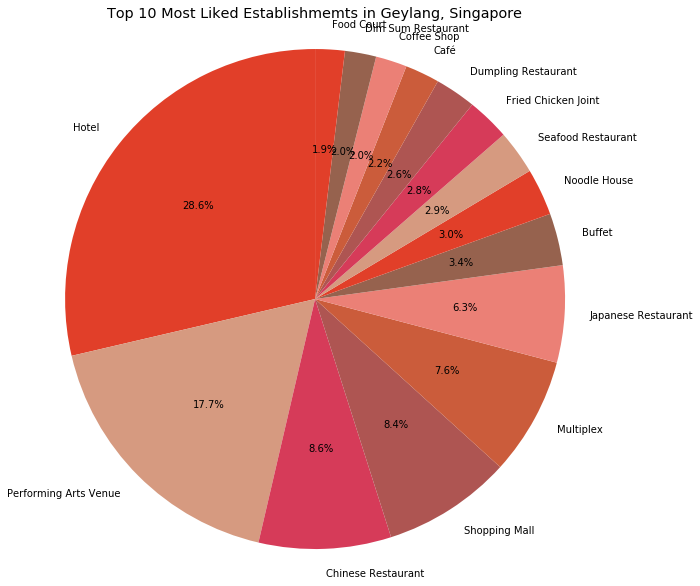

In [97]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    geylang_likes_display['Likes Count'],
    # with the labels being officer names
    labels=geylang_likes_display['Venue Category'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Top 10 Most Liked Establishmemts in Geylang, Singapore')

# View the plot
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,9)
plt.show()


## Analyze how many existing Fitness Center are located within 5 km Radius of most Liked area in Geylang

In [98]:
geylang_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes Count
0,ASTON MANSIONS,1.314311,103.890714,Poolside,1.314369,103.890602,Pool,0
1,ASTON MANSIONS,1.314311,103.890714,Sishu Szechuan Cuisine,1.314679,103.890546,Szechuan Restaurant,0
2,COSMO,1.309576,103.881040,สกี บั้ม,1.309981,103.881225,Ski Area,0
3,DAKOTA RESIDENCES,1.306373,103.887085,Kimage Prestige,1.306289,103.887471,Health & Beauty Service,1
4,DAKOTA RESIDENCES,1.306373,103.887085,Dakota Residences Swimming Pool,1.306556,103.887223,Pool,0
...,...,...,...,...,...,...,...,...
206,STARVILLE,1.327739,103.911272,Playground @ Starville,1.327618,103.911622,Playground,0
207,VACANZA @ EAST,1.329020,103.914196,Swimming Pool,1.329152,103.913796,Gym Pool,0
208,WINDY HEIGHTS,1.326565,103.909766,Tennis Court @ Windy Height,1.326722,103.910066,Tennis Court,0
209,WINDY HEIGHTS,1.326565,103.909766,The Salad Cafe,1.326945,103.909867,Salad Place,0


In [99]:
geylang_ordered = geylang_venues.sort_values(by='Likes Count', ascending=False)
geylang_ordered

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes Count
118,ESPLANADE - THEATRES ON THE BAY,1.290205,103.855567,Esplanade - Theatres On The Bay,1.289837,103.855404,Performing Arts Venue,789
67,"THE RITZ-CARLTON, MILLENIA SINGAPORE",1.290731,103.860099,"The Ritz-Carlton, Millenia Singapore",1.290754,103.860091,Hotel,429
48,"MANDARIN ORIENTAL, SINGAPORE",1.290555,103.858457,"Mandarin Oriental, Singapore (Mandarin Oriental)",1.290819,103.858297,Hotel,317
53,MARINA MANDARIN,1.291574,103.857027,PARKROYAL COLLECTION,1.291803,103.857193,Hotel,243
111,CONRAD CENTENNIAL SINGAPORE,1.293491,103.858780,Conrad Centennial Singapore,1.293364,103.858942,Hotel,240
...,...,...,...,...,...,...,...,...
186,BLISS RESIDENCES,1.320129,103.912128,Dad's Coffee Shop @ Kembangan,1.320027,103.911938,Coffee Shop,0
187,ENTREPRENEUR BUSINESS CENTRE,1.337234,103.902617,Asian Food Holding Pte Ltd,1.337660,103.902528,Asian Restaurant,0
188,ENTREPRENEUR BUSINESS CENTRE,1.337234,103.902617,Thai Luang Canteen,1.337640,103.902643,Asian Restaurant,0
189,ESCADA VIEW,1.328993,103.913477,Swimming Pool,1.329152,103.913796,Gym Pool,0


In [161]:
geylang_ordered = geylang_ordered.head(30)
geylang_ordered

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes Count
117,ESPLANADE - THEATRES ON THE BAY,1.290205,103.855567,Esplanade - Theatres On The Bay,1.289837,103.855404,Performing Arts Venue,789
62,"THE RITZ-CARLTON, MILLENIA SINGAPORE",1.290731,103.860099,"The Ritz-Carlton, Millenia Singapore",1.290754,103.860091,Hotel,429
41,"MANDARIN ORIENTAL, SINGAPORE",1.290555,103.858457,"Mandarin Oriental, Singapore (Mandarin Oriental)",1.290819,103.858297,Hotel,317
46,MARINA MANDARIN,1.291574,103.857027,PARKROYAL COLLECTION,1.291803,103.857193,Hotel,243
110,CONRAD CENTENNIAL SINGAPORE,1.293491,103.858780,Conrad Centennial Singapore,1.293364,103.858942,Hotel,240
36,LEISURE PARK KALLANG,1.302301,103.876474,Leisure Park Kallang,1.302564,103.876564,Shopping Mall,175
151,SUNTEC TOWER FOUR,1.294646,103.859724,Golden Village,1.294875,103.859675,Multiplex,170
93,PAYA LEBAR SQUARE,1.318815,103.892581,Paya Lebar Square,1.318632,103.892627,Shopping Mall,170
167,SUNTEC TOWER THREE,1.295243,103.859568,Golden Village,1.294875,103.859675,Multiplex,170
200,KINGSTON TERRACE,1.319640,103.912913,Seng Kee Black Herbal Chicken Soup 成基黑鸡补品 (Sen...,1.319313,103.913204,Chinese Restaurant,169


In [100]:
def get_nearby_liked(center_lat, center_long , test_point_lat, test_point_long):
    radius = 5 
    df_nearby = pd.DataFrame(columns=['Latitude', 'Longitude'])
    
    center_point = [{'lat': center_lat, 'lng': center_long}]
    test_point = [{'lat': test_point_lat, 'lng': test_point_long}]
    
    center_point_tuple = tuple(center_point[0].values()) 
    test_point_tuple = tuple(test_point[0].values())

    dis = distance.distance(center_point_tuple, test_point_tuple).km

    if dis <= radius:
        df_nearby = df_nearby.append({'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
        
    return df_nearby

In [101]:
df_nearby_like_geylang = pd.DataFrame(columns=['Latitude', 'Longitude'])
df_temp = pd.DataFrame(columns=['Latitude', 'Longitude'])

for rows_existing in df_existing.itertuples():
    for rows_top_geylang in geylang_ordered.itertuples():
        df_temp = get_nearby_liked(rows_existing[1], rows_existing[2], rows_top_geylang[5], rows_top_geylang[6])
        df_nearby_like_geylang = df_nearby_like_geylang.append(df_temp, ignore_index=True)


In [106]:
df_nearby_like_geylang

,Latitude,Longitude
0,1.278114,103.844202
97,1.309922,103.862091
284,1.360010,103.859571
289,1.363900,103.864884
294,1.301257,103.841150
...,...,...
13226,1.278435,103.843684
13322,1.278397,103.843674
13418,1.288481,103.849145
13623,1.291515,103.844586


In [107]:
df_nearby_like_geylang = df_nearby_like_geylang.drop_duplicates(subset=['Latitude', 'Longitude'])
df_nearby_like_geylang

,Latitude,Longitude
0,1.278114,103.844202
97,1.309922,103.862091
284,1.360010,103.859571
289,1.363900,103.864884
294,1.301257,103.841150
...,...,...
13226,1.278435,103.843684
13322,1.278397,103.843674
13418,1.288481,103.849145
13623,1.291515,103.844586


In [105]:
df_nearby_like_geylang["Latitude"] = df_nearby_like_geylang["Latitude"].astype("float")
df_nearby_like_geylang["Longitude"] = df_nearby_like_geylang["Longitude"].astype("float")
df_nearby_like_geylang.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Latitude     float64
Longitude    float64
dtype: object

### Add the location of the existing fitness center to nearest most liked establishments in Geylang to the Folium Map

In [108]:
for lat, lng in zip(df_nearby_like_geylang['Latitude'], df_nearby_like_geylang['Longitude']):
    label = '{}, {}'.format(general_loc, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_geylang)  
    
map_geylang

## Analyze most common venue around Geylang, Singapore area

In [109]:
geylang_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Likes Count
Neighbourhood,,,,,,,
ASTON MANSIONS,2,2,2,2,2,2,2
ATRIX,1,1,1,1,1,1,1
AUTOMOBILE MEGAMART,1,1,1,1,1,1,1
BLISS RESIDENCES,1,1,1,1,1,1,1
CAMELLIA LODGE,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
UBI BIZ-HUB,1,1,1,1,1,1,1
VACANZA @ EAST,1,1,1,1,1,1,1
VIENTO,1,1,1,1,1,1,1


In [110]:
print('There are {} uniques categories.'.format(len(geylang_venues['Venue Category'].unique())))

There are 87 uniques categories.


In [118]:
# one hot encoding
geylang_onehot = pd.get_dummies(geylang_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
geylang_onehot['Neighbourhood'] = geylang_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [geylang_onehot.columns[-1]] + list(geylang_onehot.columns[:-1])
geylang_onehot = geylang_onehot[fixed_columns]

geylang_onehot.head()

,Neighbourhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Betting Shop,...,Steakhouse,Supermarket,Swiss Restaurant,Szechuan Restaurant,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,ASTON MANSIONS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ASTON MANSIONS,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,COSMO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DAKOTA RESIDENCES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DAKOTA RESIDENCES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
geylang_grouped = geylang_onehot.groupby('Neighbourhood').mean().reset_index()
geylang_grouped

,Neighbourhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Betting Shop,...,Steakhouse,Supermarket,Swiss Restaurant,Szechuan Restaurant,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,ASTON MANSIONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,ATRIX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AUTOMOBILE MEGAMART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BLISS RESIDENCES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CAMELLIA LODGE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,UBI BIZ-HUB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,VACANZA @ EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,VIENTO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,WINDY HEIGHTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [120]:
num_top_venues = 5

for hood in geylang_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = geylang_grouped[geylang_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ASTON MANSIONS----
                 venue  freq
0                 Pool   0.5
1  Szechuan Restaurant   0.5
2  American Restaurant   0.0
3        Movie Theater   0.0
4           Playground   0.0


----ATRIX----
                  venue  freq
0  Kitchen Supply Store   1.0
1   American Restaurant   0.0
2         Movie Theater   0.0
3                  Pool   0.0
4            Playground   0.0


----AUTOMOBILE MEGAMART----
                 venue  freq
0   Chinese Restaurant   1.0
1  American Restaurant   0.0
2           Restaurant   0.0
3                 Pool   0.0
4           Playground   0.0


----BLISS RESIDENCES----
                 venue  freq
0          Coffee Shop   1.0
1  American Restaurant   0.0
2           Restaurant   0.0
3                 Pool   0.0
4           Playground   0.0


----CAMELLIA LODGE----
        venue  freq
0  Art Museum   1.0
1  Hotel Pool   0.0
2        Pool   0.0
3  Playground   0.0
4    Pharmacy   0.0


----CENTRA HEIGHTS----
                           venue

In [121]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [122]:
#display the top 10 most common venues by neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = geylang_grouped['Neighbourhood']

for ind in np.arange(geylang_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(geylang_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ASTON MANSIONS,Szechuan Restaurant,Pool,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
1,ATRIX,Kitchen Supply Store,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
2,AUTOMOBILE MEGAMART,Chinese Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
3,BLISS RESIDENCES,Coffee Shop,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
4,CAMELLIA LODGE,Art Museum,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant


In [123]:
#run k clustering algorithm
#set number of clusters
kclusters = 5

geylang_grouped_clustering = geylang_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(geylang_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 4, 0, 4, 1, 3, 0, 4], dtype=int32)

In [124]:
neighborhoods_venues_sorted.shape

(92, 11)

In [125]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
geylang_merged = geylang_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
geylang_merged = geylang_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


geylang_merged.head() # check the last columns!

,postal,latitude,longtitude,searchval,blk_no,road_name,Neighbourhood,address,area,Postal district,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,39,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,39,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,398008,1.308466,103.878985,223 @ MOUNTBATTEN,223,MOUNTBATTEN ROAD,223 @ MOUNTBATTEN,223 MOUNTBATTEN ROAD 223 @ MOUNTBATTEN SINGAPO...,39,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,398495,1.311780,103.884606,28 IMPERIAL RESIDENCES,28,LORONG 26 GEYLANG,28 IMPERIAL RESIDENCES,28 LORONG 26 GEYLANG 28 IMPERIAL RESIDENCES SI...,39,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,398026,1.314311,103.890714,ASTON MANSIONS,3,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14,...,Szechuan Restaurant,Pool,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store


### Cluster 1 - Ethnics restaurants

In [126]:
geylang_merged.loc[geylang_merged['Cluster Labels'] == 0, geylang_merged.columns[[1] + list(range(5, geylang_merged.shape[1]))]]

,latitude,road_name,Neighbourhood,address,area,Postal district,General location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
165,1.315356,LORONG 31 GEYLANG,CAMELLIA LODGE,31 LORONG 31 GEYLANG CAMELLIA LODGE SINGAPORE ...,38,14,"Geylang, Eunos, Aljunied",0.0,Art Museum,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
175,1.315539,LORONG 31 GEYLANG,CHOON MOEY MANSIONS,36 LORONG 31 GEYLANG CHOON MOEY MANSIONS SINGA...,38,14,"Geylang, Eunos, Aljunied",0.0,Art Museum,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
179,1.315195,LORONG 31 GEYLANG,COSY LODGE,29 LORONG 31 GEYLANG COSY LODGE SINGAPORE 388029,38,14,"Geylang, Eunos, Aljunied",0.0,Art Museum,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant


### Cluster 2 - Daily needs shopping

In [127]:
geylang_merged.loc[geylang_merged['Cluster Labels'] == 1, geylang_merged.columns[[1] + list(range(5, geylang_merged.shape[1]))]]

,latitude,road_name,Neighbourhood,address,area,Postal district,General location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,1.331550,UBI AVENUE 2,AUTOMOBILE MEGAMART,61 UBI AVENUE 2 AUTOMOBILE MEGAMART SINGAPORE ...,40,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
135,1.316394,GEYLANG ROAD,TANJONG KATONG COMPLEX,845 GEYLANG ROAD TANJONG KATONG COMPLEX SINGAP...,40,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Shopping Mall,Vegetarian / Vegan Restaurant,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
168,1.314817,LORONG 35 GEYLANG,CENTRA LOFT,3 LORONG 35 GEYLANG CENTRA LOFT SINGAPORE 387935,38,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
180,1.316015,GEYLANG EAST AVENUE 1,CRYSTAL DEW,10 GEYLANG EAST AVENUE 1 CRYSTAL DEW SINGAPORE...,38,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
209,1.314874,GEYLANG ROAD,ORIENTAL VENTURE BUILDING,711 GEYLANG ROAD ORIENTAL VENTURE BUILDING SIN...,38,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
236,1.314786,GEYLANG ROAD,TEAMBUILD CENTRE,701 GEYLANG ROAD TEAMBUILD CENTRE SINGAPORE 38...,38,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Noodle House,Vegetarian / Vegan Restaurant,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
238,1.313719,GEYLANG ROAD,THE ARIZON,538 GEYLANG ROAD THE ARIZON SINGAPORE 389493,38,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
244,1.313928,LORONG 19 GEYLANG,TREASURES@G19,33 LORONG 19 GEYLANG TREASURES@G19 SINGAPORE 3...,38,14,"Geylang, Eunos, Aljunied",1.0,Coffee Shop,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
284,1.318691,CHANGI ROAD,HOTEL 81 - CHANGI,428 CHANGI ROAD HOTEL 81 - CHANGI SINGAPORE 41...,41,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,Noodle House,Vegetarian / Vegan Restaurant,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
301,1.319640,JALAN MASJID,KINGSTON TERRACE,8B JALAN MASJID KINGSTON TERRACE SINGAPORE 418929,41,14,"Geylang, Eunos, Aljunied",1.0,Chinese Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant


### Cluster 3 - Arts & Dining

In [128]:
geylang_merged.loc[geylang_merged['Cluster Labels'] == 2, geylang_merged.columns[[1] + list(range(5, geylang_merged.shape[1]))]]

,latitude,road_name,Neighbourhood,address,area,Postal district,General location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
290,1.335855,KAKI BUKIT CRESCENT,KAKI BUKIT TECHPARK I,34 KAKI BUKIT CRESCENT KAKI BUKIT TECHPARK I S...,41,14,"Geylang, Eunos, Aljunied",2.0,Electronics Store,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Court
296,1.320373,JALAN MASJID,KEMBANGAN PLAZA,18 JALAN MASJID KEMBANGAN PLAZA SINGAPORE 418944,41,14,"Geylang, Eunos, Aljunied",2.0,Theater,Electronics Store,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant
297,1.320153,JALAN MASJID,KEMBANGAN SUITES,16 JALAN MASJID KEMBANGAN SUITES SINGAPORE 418941,41,14,"Geylang, Eunos, Aljunied",2.0,Electronics Store,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Court


### Cluster 4 - Health, Beauty & Dining

In [129]:
geylang_merged.loc[geylang_merged['Cluster Labels'] == 3, geylang_merged.columns[[1] + list(range(5, geylang_merged.shape[1]))]]

,latitude,road_name,Neighbourhood,address,area,Postal district,General location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,1.331978,UBI LINK,CHALLENGER TECHUB,1 UBI LINK CHALLENGER TECHUB SINGAPORE 408553,40,14,"Geylang, Eunos, Aljunied",3.0,Food Court,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
142,1.334388,UBI AVENUE 4,UBI BIZ-HUB,150 UBI AVENUE 4 UBI BIZ-HUB SINGAPORE 408825,40,14,"Geylang, Eunos, Aljunied",3.0,Food Court,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
196,1.316595,SIMS PLACE,GREENTOPS @ SIMS PLACE,63 SIMS PLACE GREENTOPS @ SIMS PLACE SINGAPORE...,38,14,"Geylang, Eunos, Aljunied",3.0,Theater,Food Court,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
293,1.336766,KAKI BUKIT AVENUE 3,KB-1,1 KAKI BUKIT AVENUE 3 KB-1 SINGAPORE 416087,41,14,"Geylang, Eunos, Aljunied",3.0,Food Court,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant


### Cluster 5 - Hotels & Dining

In [130]:
geylang_merged.loc[geylang_merged['Cluster Labels'] == 4, geylang_merged.columns[[1] + list(range(5, geylang_merged.shape[1]))]]

,latitude,road_name,Neighbourhood,address,area,Postal district,General location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1.314311,LORONG 42 GEYLANG,ASTON MANSIONS,3 LORONG 42 GEYLANG ASTON MANSIONS SINGAPORE 3...,39,14,"Geylang, Eunos, Aljunied",4.0,Szechuan Restaurant,Pool,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
16,1.309576,GUILLEMARD CRESCENT,COSMO,18 GUILLEMARD CRESCENT COSMO SINGAPORE 399914,39,14,"Geylang, Eunos, Aljunied",4.0,Ski Area,Vegetarian / Vegan Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
17,1.306373,DAKOTA CRESCENT,DAKOTA RESIDENCES,34 DAKOTA CRESCENT DAKOTA RESIDENCES SINGAPORE...,39,14,"Geylang, Eunos, Aljunied",4.0,Pool,Health & Beauty Service,Food Court,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
24,1.312238,LORONG 20 GEYLANG,FRAGRANCE HOTEL - RUBY,10 LORONG 20 GEYLANG FRAGRANCE HOTEL - RUBY SI...,39,14,"Geylang, Eunos, Aljunied",4.0,Turkish Restaurant,Hotel,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Food Court
25,1.311758,LORONG 10 GEYLANG,FRAGRANCE HOTEL - SAPPHIRE,3 LORONG 10 GEYLANG FRAGRANCE HOTEL - SAPPHIRE...,39,14,"Geylang, Eunos, Aljunied",4.0,Hotel,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.324168,LORONG MELAYU,MALAYSIA PARK,86E LORONG MELAYU MALAYSIA PARK SINGAPORE 417022,41,14,"Geylang, Eunos, Aljunied",4.0,Diner,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Food Court
316,1.337093,KAKI BUKIT AVENUE 1,SHUN LI INDUSTRIAL PARK,101 KAKI BUKIT AVENUE 1 SHUN LI INDUSTRIAL PAR...,41,14,"Geylang, Eunos, Aljunied",4.0,Auto Garage,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
321,1.327739,LENGKONG TIGA,STARVILLE,60 LENGKONG TIGA STARVILLE SINGAPORE 417454,41,14,"Geylang, Eunos, Aljunied",4.0,Playground,Vegetarian / Vegan Restaurant,Hotel,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant
337,1.329020,LENGKONG TUJOH,VACANZA @ EAST,36 LENGKONG TUJOH VACANZA @ EAST SINGAPORE 417391,41,14,"Geylang, Eunos, Aljunied",4.0,Gym Pool,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant


In [131]:
geylang_merged.dtypes

postal                      int64
latitude                  float64
longtitude                float64
searchval                  object
blk_no                     object
road_name                  object
Neighbourhood              object
address                    object
area                        int64
Postal district             int64
General location           object
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [132]:
import matplotlib.colors as colors_

In [133]:
geylang_merged = geylang_merged.dropna(subset=['Cluster Labels'])

In [134]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
c_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors_.rgb2hex(j) for j in c_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(geylang_merged['latitude'], geylang_merged['longtitude'], geylang_merged['Neighbourhood'], geylang_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters